# Introduction
The data is of customers who buys clothes online. The store offers in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.
In this part of the project, we will import the data set and do an exploration of the data.
# Problem to be solved
The company is trying to decide whether to focus their efforts on their mobile app experience or their website. Before working on the dataset and implementing a solution to the problem, it's important to be sure that the focus is on the real problem.
As a start point, we have a company that offers in-store style and clothing advice sessions, and then online shopping through a mobile app and website. We can infere that the company doesn't know the preferred method for online shopping for its customers, so it's trying to look at historical data of customers to get a sense or recommendation on their online preferences to decide whether to focus their resources and efforts on improving the mobile app or their website experience.

Therefore, the problem is defined as: **According to historical data of past costumers, what is the preferred method for online shopping: the mobile app or the website?**
# Tackling the Problem
In order to tackle the problem, I'll use the data collected to determine the most popular method for online shopping. We're going to process the data and analyze it so as to transform it into a useful format and then move on to the analysis.
It's important to keep in mind that this data is data from third-party sources, and that I don't have any way to consider more data available nor I don't have context as to what were the surrounding factors that could influence the insights gained at the end of the analysis.

# Dealing with Data

### Importing Libraries and Loading Data
First of all, I'll import the libraries that I'll use for data exploration and processing.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../data/ecommerce.csv')

### Exploring the Data

In [10]:
df.head(10)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Here, we can see that our data type is wide, and that we have a total of $8$ columns: Email, Address, Avatar, Avg. Session Length, Time on App, Time on Website, Length of Membership, Yearly Amount Spent. We have to keep in mind that:
* We don't know what is the measurement unit for: Avg. Session Length, Time on App, Time on Website, Length of Membership, Yearly Amount Spent.
* There aren't any null objects in the dataset.
* There are $500$ entries in total.
* We don't really know what Length of Membership stands for.

In [11]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Questions to be Answered
Here are a few questions to help me guide my analysis:
1. Was the mobile app format or the website format the one which had the most time spent on?
2. Is there a relationship between the format used to do online shopping and the amount of money spent per customer?
3. In general, customers spend more time on the website or the mobile app?

Let's use Seaborn to visualize insights for answering our questions:

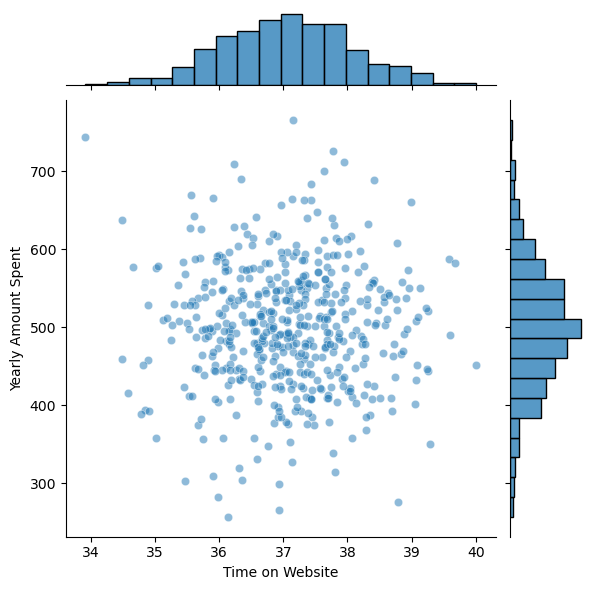

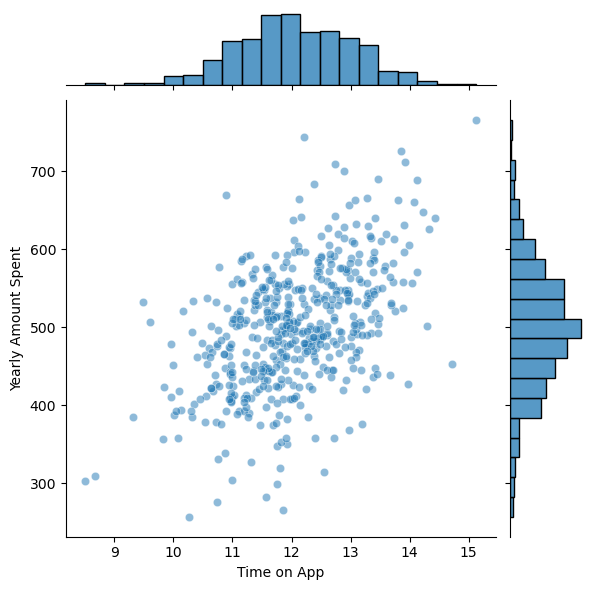

In [17]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=df, alpha=0.5)
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=df, alpha=0.5)

Here, we can see that there isn't much correlation between the time spent on the website and the yearly amount spent. However, we can see that there's a difference with the time spent on the App, which shows a tendency to yearly spent more as the time on the app grows.